In [10]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784',version=1, return_X_y=True)

### PCA

Use PCA to reduce the dimensionality

a. How many components did you use? Why?

b. Plot the first two components. Do you notice any trends? What is this plot showing us?

c. Why would you use PCA? What is it doing? And what are the drawbacks?

d. Plot some of the images, then compress them using PCA and plot again. How does it look?


First, let's briefly examine the data and center it around zero (necessary for PCA)

In [3]:
X_df = pd.DataFrame(X)
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
X_scaled = X_df - X_df.mean()

In [25]:
pca = PCA(n_components=.95)
X_95perc = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

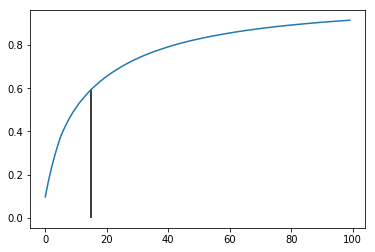

In [73]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[15], x=15)

Above is a  plot of the cumulative variance explained. There appears to be an elbow at about 15.

To confirm, a scree plot below and a plot showing how much smaller each subsequent component is shows that after about 15, components get smaller at a similar rate

In [35]:
var = pca.explained_variance_ratio_
deltas = [var[num]-var[num+1] for num,v in enumerate(var[0:-1])]

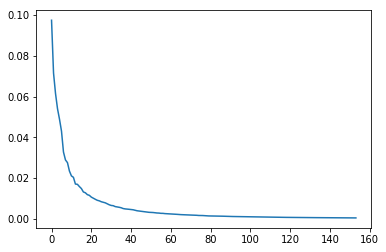

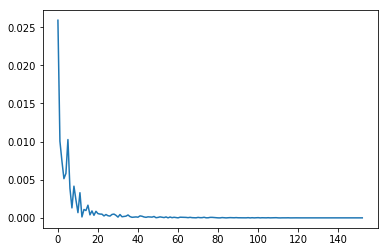

In [39]:
plt.plot(range(len(var)), var)
plt.figure()
plt.plot(range(len(deltas)), deltas) 
#this plots how much smaller the next eigenvalue is



It seems that at about 15, each component stops adding much beyond the previous. So we'll go with 15. 

b. Plot the first two components. Do you notice any trends? What is this plot showing us?

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


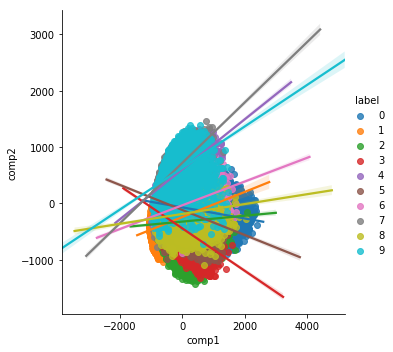

In [20]:
#pca = PCA(n_components=2)
#X_2dim = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame({'comp1':X_2dim[:,0],'comp2':X_2dim[:,1],'label':y})
sns.lmplot(x='comp1',y='comp2',data=df_pca,hue='label')

It doesn't looks like there is much of a relationship between the first and second components. Larger positive values of the first component tend to occur when the second component is close to zero. Below, the correlation matrix shows that they are not correlated.

Looks like the different values still cluster together, even with only 2 dimensions. That's pretty cool. Still, it is very uneven

In [58]:
pd.DataFrame(X_2dim).corr()

,0,1
0,1.000000e+00,2.118797e-16
1,2.118797e-16,1.000000e+00


c. Why would you use PCA? What is it doing? And what are the drawbacks?
<br> <br>
    PCA is trying to maximize the variance explained in your data using one variable. It could help you when you have too many features for you data, so you avoid problems with high variance. However, the features are not as meaningful and are required to be orthogonal to each other

d. Plot some of the images, then compress them using PCA and plot again. How does it look?


#### Original Images
In blue and red to be easier to see

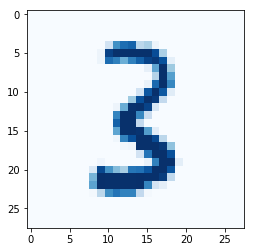

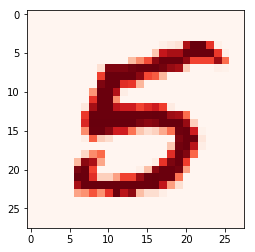

In [67]:
plt.imshow(X[50000].reshape((28,28)), cmap='Blues')
plt.figure()
plt.imshow(X[20000].reshape((28,28)), cmap='Reds')

#### Images from 15 dimensions (60% of the variance explained)
Pretty much recognizable here. But still pretty blurry

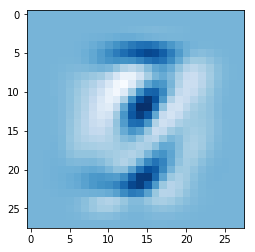

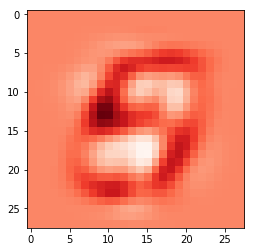

In [5]:
pca = PCA(n_components=15)
X_15dim = pca.fit_transform(X_scaled)
recreated = pca.inverse_transform(X_15dim)
plt.imshow(recreated[50000].reshape((28,28)), cmap='Blues')
plt.figure()
plt.imshow(recreated[20000].reshape((28,28)), cmap='Reds')

#### Images from 145 dimensions (95% of the variance explained)
Almost as good as the originals. More blue/red because they are centered

(70000, 154)


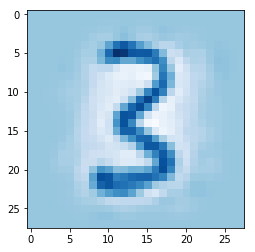

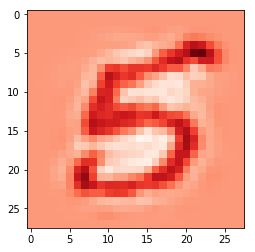

In [7]:
pca = PCA(n_components=.95)
X_95perc = pca.fit_transform(X_scaled)
print(X_95perc.shape)
recreated = pca.inverse_transform(X_95perc)
plt.imshow(recreated[50000].reshape((28,28)), cmap='Blues')
plt.figure()
plt.imshow(recreated[20000].reshape((28,28)), cmap='Reds')

Looks like the 15 components still loosely gets the shape, but fairly blury. With 1/5th of the features (about 150 for 95% of the variance) we can still display the figure really well.

### T-SNE

Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

a. How does this plot differ from your PCA plot?

b. How robust is it to changes in perplexity?

c. How robust is it to different learning rate and number of iterations?

In [28]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select=10000

tsne = TSNE(n_components=2,verbose=1, perplexity=50, n_iter=1000,
           learning_rate=200)
tsne_results = tsne.fit_transform(X_15dim[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.100s...
[t-SNE] Computed neighbors for 10000 samples in 37.294s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 232.829664
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.972374
[t-SNE] KL divergence after 1000 iterations: 1.672413


Below, I plot TSNE with perplexity of 50, 20, and 5. For some reason 5 seems clearer than 50. The general shape is the same, but with 50 several of the clusters are not well-captured

#### Perplexity = 50

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


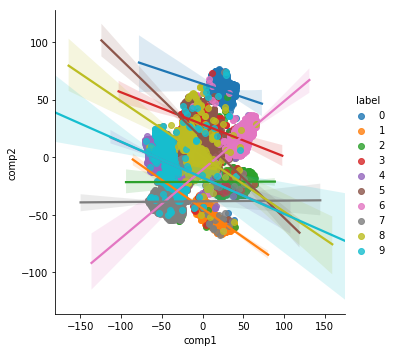

In [29]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1','comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1',y='comp2',data=df_tsne,hue='label')

#### Perplexity = 20

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.048s...
[t-SNE] Computed neighbors for 10000 samples in 17.634s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 179.930868
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.608315
[t-SNE] KL divergence after 1000 iterations: 1.816007


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


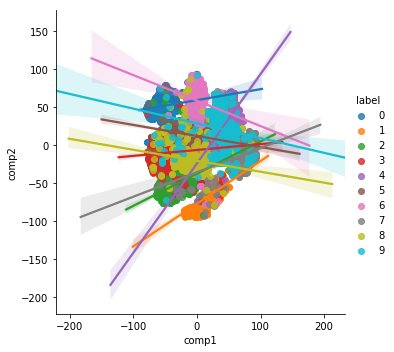

In [13]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select=10000

tsne = TSNE(n_components=2,verbose=1, perplexity=20, n_iter=1000,
           learning_rate=200)
tsne_results = tsne.fit_transform(X_15dim[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1','comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1',y='comp2',data=df_tsne,hue='label')

#### Perplexity = 5

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.060s...
[t-SNE] Computed neighbors for 10000 samples in 10.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 141.988253
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.065109
[t-SNE] KL divergence after 1000 iterations: 1.895303


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


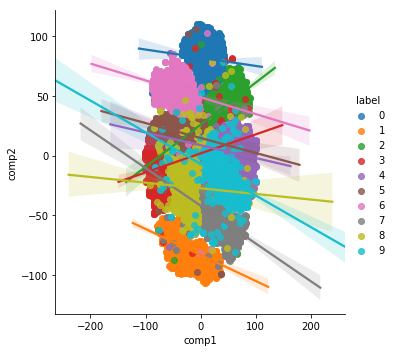

In [14]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select=10000

tsne = TSNE(n_components=2,verbose=1, perplexity=5, n_iter=1000,
           learning_rate=200)
tsne_results = tsne.fit_transform(X_15dim[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1','comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1',y='comp2',data=df_tsne,hue='label')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.047s...
[t-SNE] Computed neighbors for 10000 samples in 9.543s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 150.936206
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.902603
[t-SNE] KL divergence after 1000 iterations: 1.891797


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


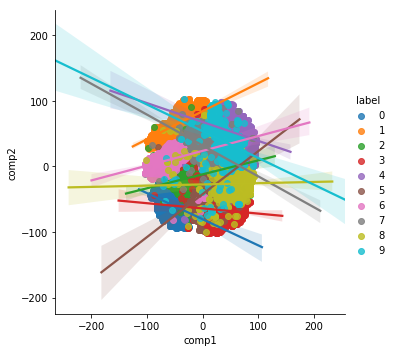

In [51]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select=10000

tsne = TSNE(n_components=2,verbose=1, perplexity=5, n_iter=1000,
           learning_rate=200)
tsne_results = tsne.fit_transform(X_15dim[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1','comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1',y='comp2',data=df_tsne,hue='label')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.063s...
[t-SNE] Computed neighbors for 10000 samples in 9.890s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 149.505618
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.882980
[t-SNE] KL divergence after 1000 iterations: 1.879509


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


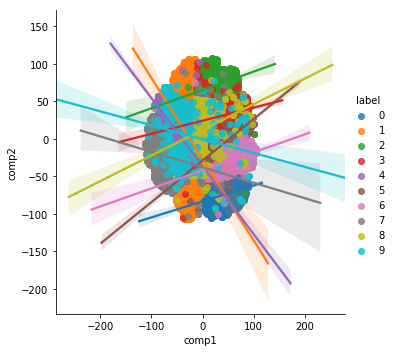

In [52]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select=10000

tsne = TSNE(n_components=2,verbose=1, perplexity=5, n_iter=1000,
           learning_rate=1000)
tsne_results = tsne.fit_transform(X_15dim[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1','comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1',y='comp2',data=df_tsne,hue='label')

In [ ]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select=10000

tsne = TSNE(n_components=2,verbose=1, perplexity=5, n_iter=1000,
           learning_rate=5000)
tsne_results = tsne.fit_transform(X_15dim[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1','comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1',y='comp2',data=df_tsne,hue='label')

Perform k-means clustering:

a. How did you choose k?

b. How did you evaluate your clustering?

c. Visualize your clusters using t-sne

d. Did you scale your data?

e. How robust is your clustering?

Scaling Data to make every variable centered at 0 and have a sd of 1

In [15]:
from sklearn.preprocessing import StandardScaler as sdscale
scaler = sdscale()
scaler.fit(X)
std_X = pd.DataFrame(scaler.transform(X))

In [8]:
from sklearn.preprocessing import StandardScaler as sdscale
scaler = sdscale()
scaler.fit(X_15dim)
std_X15 = pd.DataFrame(scaler.transform(X_15dim))

In [32]:

kmeans = KMeans(n_clusters=6, n_init=50, n_jobs=-1)
kmeans.fit(X_15dim)

In [25]:
crosstab_df = pd.DataFrame(pd.crosstab(kmeans.predict(X_15dim),y))

In [34]:
crosstab_df

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,56,5,195,187,3694,460,101,2137,179,3383
1,218,8,353,4570,1,2067,24,4,1178,92
2,2087,2,218,508,67,1359,623,15,176,23
3,216,9,149,35,209,100,5049,3,61,12
4,13,9,74,48,2218,276,2,4248,211,2833
5,14,9,4788,174,50,8,180,61,54,29
6,62,7,231,909,19,929,35,20,4064,63
7,4207,0,38,20,8,75,84,17,38,43
8,8,3661,393,70,261,437,75,313,391,105


In [41]:
crosstab_df = pd.DataFrame(pd.crosstab(kmeans.predict(X_15dim),y))
table = crosstab_df.max()/crosstab_df.sum()
minperc = table.min()
meanperc = table.mean()
print(minperc)

0.3274196103278948


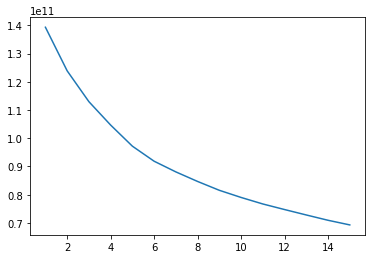

In [36]:
sses = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    kmeans.fit(X_15dim)
    sses.append(kmeans.inertia_)
plt.plot(range(1,16),sses)

0.6704416609839314
0.6754583477153983
0.6460654248026039
0.612286223529006
0.5591378108502518
0.5224148662852375
0.5092247115316002


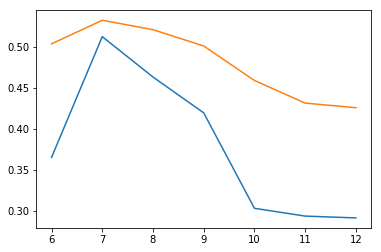

In [33]:
meanperc = []
minperc = []
total = pd.concat([pd.DataFrame(std_X15), pd.DataFrame(y, columns=['y'])],axis=1)
mysample = total.sample(frac=.01,axis=0)
y_sample = total['y']
mysample = total.iloc[:,0:15]
for k in range(6,13):
    kmeans = KMeans(n_clusters=k, n_init=10, n_jobs=-1)
    kmeans.fit(mysample)
    crosstab_df = pd.DataFrame(pd.crosstab(kmeans.predict(mysample),y_sample))
    table = crosstab_df.max()/crosstab_df.sum()
    minperc.append(table.min())
    print(table.mean())
    meanperc.append(table.mean()-1/k) #adjusting based on what we'd expect for k
plt.plot(range(6,13),minperc)
plt.plot(range(6,13),meanperc)

In [42]:
print(meanperc)
print(minperc)

[0.5037749943172648, 0.5326012048582554, 0.5210654248026039, 0.5011751124178949, 0.45913781085025185, 0.43150577537614654, 0.4258913781982669]
[0.36527472527472526, 0.5125930619356882, 0.46332963725645493, 0.4196103278948202, 0.3031839062252495, 0.29367970853793757, 0.29146206241089817]


#### Evaluating clusters
Because we have "true" clusters given in the data, I calculating a metric to approximate how well each cluster does. This essentially examines each cluster, to see what proportion is classified as one true class (e.g. the first cluster may classify 5000/8000 as '2''s). We can simply label each cluster by the biggest category. Then, I take the mean for each cluster and subtract 1/k, which is the proportion it should "correctly" identify by chance.

It looks like a k of 7 seems to give the highest mean (adjusted for chance) and the highest minimum value (e.g. the class that is classified the worst)

Looking at several bootstraps of the data to test robustness

In [11]:
from sklearn.metrics import silhouette_score
total = pd.concat([pd.DataFrame(std_X15), pd.DataFrame(y, columns=['y'])],axis=1)

sses = []
sil = []
meanperc_list = []
minperc_list = []
for x in range(1,10):
    mysample = total.sample(frac=.01,axis=0)
    y_sample = total['y']
    newdf = total.iloc[:,0:15]
    kmeans = KMeans(n_clusters=7, n_init=10, n_jobs=-1)
    kmeans_model = kmeans.fit(newdf)
    sses.append(kmeans_model.inertia_)
    labels = kmeans_model.labels_
    sil.append(silhouette_score(newdf,labels,metric='euclidean'))
    crosstab_df = pd.DataFrame(pd.crosstab(kmeans.predict(mysample),y_sample))
    table = crosstab_df.max()/crosstab_df.sum()
    minperc_list.append(table.min())
    maxperc_list.append(table.mean())
    
print(minperc_list)
print(meanperc_list)
print(sses)
print(sil)


ValueError: Incorrect number of features. Got 16 features, expected 15

T-SNE Visualization

In [34]:

kmeans = KMeans(n_clusters=10, n_init=10, n_jobs=-1)
kmeans.fit(total)
yhat = kmeans.predict(total)
print(yhat)

[3 4 7 ... 7 7 2]


In [36]:
yhat.shape

(70000,)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.052s...
[t-SNE] Computed neighbors for 10000 samples in 15.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 145.882611
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.044014
[t-SNE] KL divergence after 1000 iterations: 1.895360


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


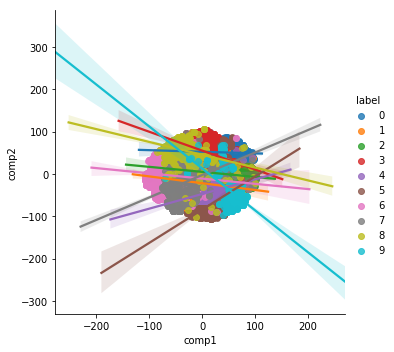

In [50]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select=10000

tsne = TSNE(n_components=2,verbose=1, perplexity=5, n_iter=1000,
           learning_rate=200)
tsne_results = tsne.fit_transform(X_15dim[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1','comp2'])
df_tsne['label'] = yhat[rows[:n_select]]
sns.lmplot(x='comp1',y='comp2',data=df_tsne,hue='label')


Perform hierarchical clustering:

a. Plot your dendrogram

b. How many clusters seem reasonable based off your graph?

c. How does your dendrogram change with different linkage methods?

For the first graph, it seems that there could be between about 8 and 15 clusters based on the line. The graph with ward linkage (which minimizes within-cluster variance) seems to suggest fewer and a narrower range: about 6 to 10. Using average seems very unclear as far as how many clusters to use

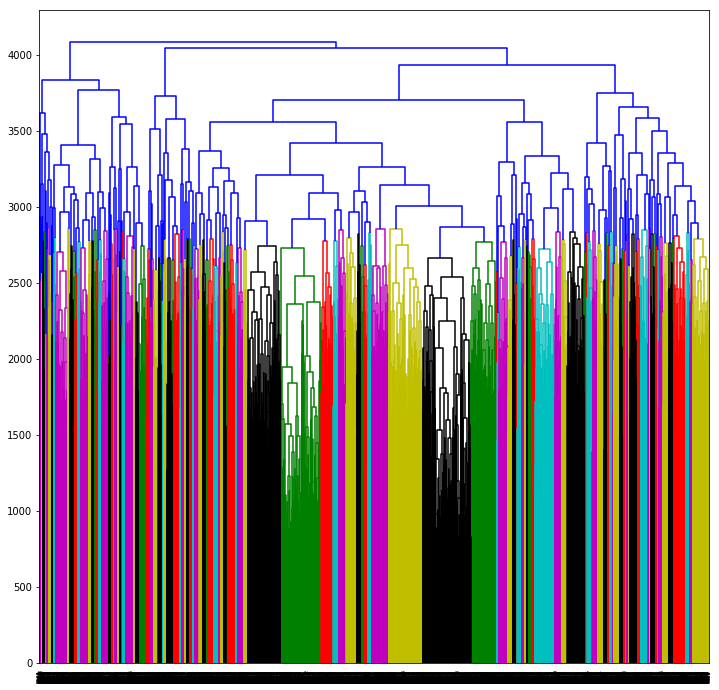

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
tenperc_df = pd.DataFrame(X_scaled).sample(frac=.1)
Z=linkage(tenperc_df,'complete')
plt.figure(figsize = (12,12))
_ = dendrogram(Z)

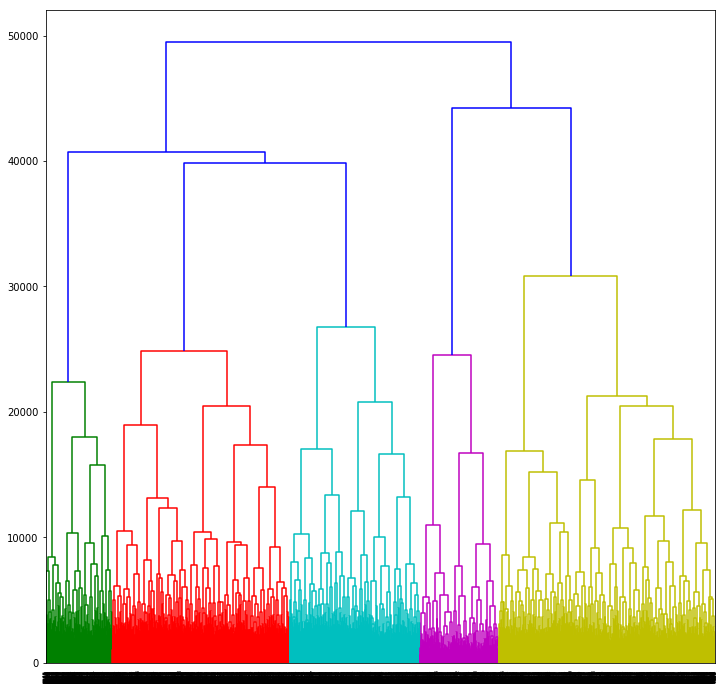

In [23]:

Z=linkage(tenperc_df,'ward')
plt.figure(figsize = (12,12))
_ = dendrogram(Z)

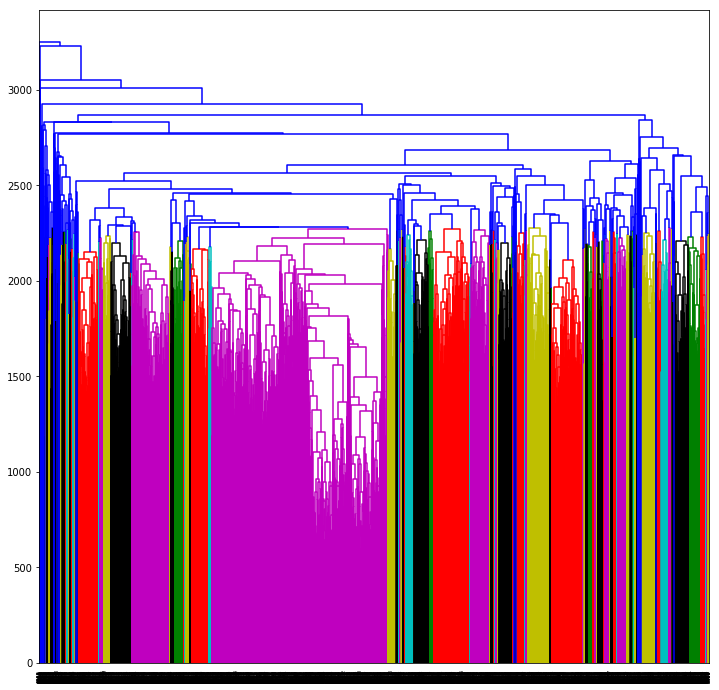

In [25]:

Z=linkage(tenperc_df,'average')
plt.figure(figsize = (12,12))
_ = dendrogram(Z)